# Phase 3 Data Science Training Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Exploratory Data Analysis

In [2]:
# Assume tar.gz file to be extracted at project directory.
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
# Process the files into dataset.
set1 = unpickle('.\\cifar-10-batches-py\\data_batch_1')
set2 = unpickle('.\\cifar-10-batches-py\\data_batch_2')
set3 =  unpickle('.\\cifar-10-batches-py\\data_batch_3')
set4 =  unpickle('.\\cifar-10-batches-py\\data_batch_4')
set5 =  unpickle('.\\cifar-10-batches-py\\data_batch_5')
testset = unpickle('.\\cifar-10-batches-py\\test_batch')

# Showing the Shape

In [4]:
# Find the keys
set1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [5]:
# Print the shape for each dataset

print(set1[b'data'].shape)
print(set2[b'data'].shape)
print(set3[b'data'].shape)
print(set4[b'data'].shape)
print(set5[b'data'].shape)
print(testset[b'data'].shape)

# Our dataset contains 10000 lists, each list containing 3072 elements representing the uint8 value of a pixel in the image.

(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)


## Getting one image

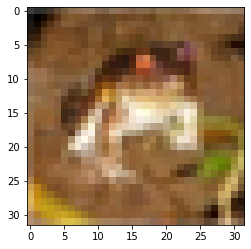

In [6]:
# List variables
listsize = 10000
imgsize = 32

# Reshape and transpose one image
set1_images = set1[b'data']
set1_images = set1_images.reshape(listsize, 3, imgsize, imgsize)
set1_images =  set1_images.transpose(0, 2, 3, 1)

# We have a frog.
plt.imshow(set1_images[0])

# Rendering 5 images of each label

In [7]:
set1_labels = set1[b'labels']

# Testprint
#for i in range(listsize):
#    print(set1_labels[i])

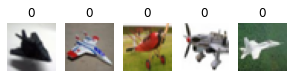

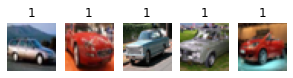

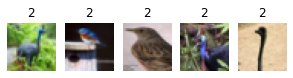

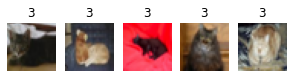

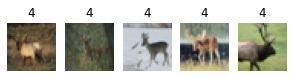

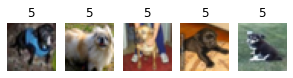

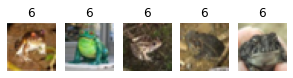

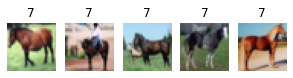

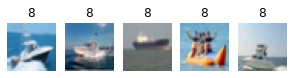

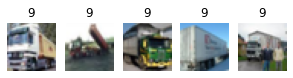

In [8]:
labelnames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
labelindices = [ [], [] , [], [], [], [], [], [], [], []]

# go through entire list and add all label indices for each label.
for i in range(listsize):
    labelindices[set1_labels[i]].append(i)

# just check if indices are being added
# print(labelindices[0])


# create plot
# go through 10 indices
for i in range(10):
    plt.figure(figsize=(5, 10))
    # go through 5 labels
    for j in range(5):
        plt.subplot(1,5,j+1)
        plt.imshow(set1_images[labelindices[i][j]])
        plt.axis('off')
        plt.title(i)
    plt.show

I will be choosing DOGS, label 5 as my desired label in my model. As they are man's best friend.

# Data Processing

# process megaset and training images and labels 

In [9]:
# Combine all image data into one into one megaset convert into a dataframe. same for testset images 
megaset_images = np.concatenate([set1[b'data'],set2[b'data'],set3[b'data'],set4[b'data'],set5[b'data']])
training_images = testset[b'data']
# make sure dataframes are in shape aswell
megaset_images = megaset_images.reshape(listsize * 5, 3, imgsize, imgsize).transpose(0, 2, 3, 1).astype("uint8")
training_images = training_images.reshape(listsize, 3, imgsize, imgsize).transpose(0, 2, 3, 1).astype("uint8")
# Test if shape is correct
#megaset_images.shape
# WE HAVE A FROG!
#plt.imshow(megaset_images[0])

In [10]:
# Combine all label data into one into one megaset convert into a dataframe. same for testset labels 
megaset_labels = np.concatenate([set1[b'labels'],set2[b'labels'],set3[b'labels'],set4[b'labels'],set5[b'labels']])
training_labels = testset[b'labels']

# check shape is correct
megaset_images.shape

(50000, 32, 32, 3)

In [11]:
# get every label indice in megaset and trainingset
megaset_indices =   [[], [] , [], [], [], [], [], [], [], []]
training_indices = [[], [] , [], [], [], [], [], [], [], []]

for i in range(5 * listsize):
    megaset_indices[megaset_labels[i]].append(i)

# just check if indices are being added
#print(megaset_indices[0])

for i in range(listsize):
    training_indices[training_labels[i]].append(i)

# 10k set for training, 2k set for testing, [data[], label[]]
ten_k_set = [[],[]]
two_k_set = [[],[]]

# sets should be half dog and half of other indices
# put the dog portion first
for i in range(5000):
    ten_k_set[0].append(megaset_images[megaset_indices[5][i]])
    ten_k_set[1].append(5)
for i in range(1000):
    two_k_set[0].append(training_images[training_indices[5][i]])
    two_k_set[1].append(5)


# For 10k set put in indices that are not dog, 556 of the first 5, 2780, then 555 of the last 4, 5000
for i in range(5):
    for j in range(556):
            ten_k_set[0].append(megaset_images[megaset_indices[i][j]])
            ten_k_set[1].append(i)

for i in range(6,10):
    for j in range(555):
            ten_k_set[0].append(megaset_images[megaset_indices[i][j]])
            ten_k_set[1].append(i)

# print(len(ten_k_set[1]))

# For 2k set put in indices that are not dog, 112 of the first, 112, then 111 of the last 8, 1000

for j in range(112):
        two_k_set[0].append(training_images[training_indices[0][j]])
        two_k_set[1].append(0)

for i in range(1,5):
    for j in range(111):
            two_k_set[0].append(training_images[training_indices[i][j]])
            two_k_set[1].append(i)

for i in range(6,10):
    for j in range(111):
            two_k_set[0].append(training_images[training_indices[i][j]])
            two_k_set[1].append(i)


# print(two_k_set[0].shape)
# print(len(two_k_set[1]))
# Testprint for index
#print(ten_k_set[1][5000])


In [12]:
#put everything in the dataframes

# create the datasets with 1 column of images, 1 column of labels.
training_df = pd.DataFrame()
testing_df = pd.DataFrame()

training_df['images'] = ten_k_set[0]
training_df['labels'] = ten_k_set[1]
testing_df['images'] = two_k_set[0]
testing_df['labels'] = two_k_set[1]

# change all dog labels to 1, and all non-dog labels to 0
training_df['labels'] = training_df['labels'].apply(lambda x:1 if x==5 else 0)
testing_df['labels'] = testing_df['labels'].apply(lambda x:1 if x==5 else 0)




# checking image @ index
#plt.imshow(testing_df['images'][1000])



In [13]:
# just make sure everything is even as needed.
training_df['labels'].value_counts()

1    5000
0    5000
Name: labels, dtype: int64

In [14]:
testing_df['labels'].value_counts()

1    1000
0    1000
Name: labels, dtype: int64

In [15]:
# Make x,y training and testing set
train_x = np.array(pd.Series.to_list(training_df['images']))
train_y = training_df['labels']
test_x = np.array(pd.Series.to_list(testing_df['images']))
test_y = testing_df['labels']

In [16]:
#check datatypes
print(type(train_x))
print(type(train_y))

# check shape

print(test_y)

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: labels, Length: 2000, dtype: int64


# Data Modelling

In [17]:
import tensorflow as tf
from keras import Input, layers, Sequential, optimizers, losses, callbacks
from datetime import datetime
import keras_tuner as kt

In [18]:
def generateModel(hp=None):
    """
    Make a Keras Sequential Model.
    Feel free to change the layout of the layers.

    Read more about keras here: https://keras.io/api/
    Tensorflow setup adapted here: https://www.tensorflow.org/tutorials/quickstart/beginner
    """
    model = Sequential(name="Image_Recognition_Model")
    model.add(Input(shape=(32,32,3))) # Input layer.

    model.add(layers.Rescaling(scale=1./255, name="Normaliser")) # Example pre-processing layer.

    model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(1, activation="sigmoid", name="Output_Probability")) # Output layer.

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [20]:
model = generateModel()

log_dir = "output/logs/"

# Callbacks for QoL.
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

model.fit(train_x,train_y,
    validation_data=(test_x, test_y),
    epochs=20,
    batch_size=1000, # Set this to a lower number if your computer spec is bad.
    callbacks=[tensorboard_callback, earlystop_callback],
    # verbose=0 # Uncomment this line to reduce the printing on console.
)

Epoch 1/20
10/10 [==============================] - 6s 540ms/step - loss: 0.7348 - accuracy: 0.5227 - val_loss: 0.6826 - val_accuracy: 0.5795
Epoch 2/20
10/10 [==============================] - 5s 508ms/step - loss: 0.6740 - accuracy: 0.5818 - val_loss: 0.6575 - val_accuracy: 0.6755
Epoch 3/20
10/10 [==============================] - 5s 534ms/step - loss: 0.6386 - accuracy: 0.6742 - val_loss: 0.6171 - val_accuracy: 0.6855
Epoch 4/20
10/10 [==============================] - 5s 513ms/step - loss: 0.6009 - accuracy: 0.6798 - val_loss: 0.5842 - val_accuracy: 0.6885
Epoch 5/20
10/10 [==============================] - 5s 506ms/step - loss: 0.5728 - accuracy: 0.6974 - val_loss: 0.5653 - val_accuracy: 0.6925
Epoch 6/20
10/10 [==============================] - 5s 475ms/step - loss: 0.5518 - accuracy: 0.7140 - val_loss: 0.5433 - val_accuracy: 0.7265
Epoch 7/20
10/10 [==============================] - 5s 463ms/step - loss: 0.5348 - accuracy: 0.7229 - val_loss: 0.5280 - val_accuracy: 0.7420
Epoch 

In [47]:
# show model summary
model.summary()

Model: "Image_Recognition_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Normaliser (Rescaling)      (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 64)                921664    
                                                                 
 Output_Probability (Dense)  (None, 1)                 65        
                                           

In [21]:
# save model to folder
model.save('output/my_model')

INFO:tensorflow:Assets written to: output/my_model\assets


INFO:tensorflow:Assets written to: output/my_model\assets


In [22]:
# Check model accuracy
model.evaluate(test_x, test_y)

63/63 [==============================] - 1s 7ms/step - loss: 0.4596 - accuracy: 0.7790


[0.4596039950847626, 0.7789999842643738]

# Advanced Features

In [23]:
# Hyperparameterization Tuning

# create the tuner.
tuner = kt.RandomSearch(
    generateModel,
    objective='val_accuracy',
    max_trials=20,
    directory='output\\hyper_model',
    project_name='hyper_model')


tuner.search(train_x, train_y,
             epochs=20,
             validation_data=(test_x, test_y))

Trial 1 Complete [00h 02m 11s]
val_accuracy: 0.8140000104904175

Best val_accuracy So Far: 0.8140000104904175
Total elapsed time: 00h 02m 11s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [24]:
# create hypermodel with best possible paramenters.
hyper_model = tuner.hypermodel.build(tuner.get_best_hyperparameters()[0])

# repeat model test
hyper_model.fit(train_x,train_y,
    validation_data=(test_x, test_y),
    epochs=20,
    batch_size=1000, # Set this to a lower number if your computer spec is bad.
    callbacks=[tensorboard_callback, earlystop_callback],
    # verbose=0 # Uncomment this line to reduce the printing on console.
)

Epoch 1/20
10/10 [==============================] - 5s 499ms/step - loss: 0.8627 - accuracy: 0.5061 - val_loss: 0.7298 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 5s 477ms/step - loss: 0.6752 - accuracy: 0.5856 - val_loss: 0.6407 - val_accuracy: 0.6745
Epoch 3/20
10/10 [==============================] - 4s 439ms/step - loss: 0.6188 - accuracy: 0.6804 - val_loss: 0.5883 - val_accuracy: 0.6990
Epoch 4/20
10/10 [==============================] - 4s 434ms/step - loss: 0.5721 - accuracy: 0.6996 - val_loss: 0.5515 - val_accuracy: 0.7130
Epoch 5/20
10/10 [==============================] - 4s 437ms/step - loss: 0.5434 - accuracy: 0.7200 - val_loss: 0.5334 - val_accuracy: 0.7265
Epoch 6/20
10/10 [==============================] - 5s 476ms/step - loss: 0.5205 - accuracy: 0.7291 - val_loss: 0.5150 - val_accuracy: 0.7345
Epoch 7/20
10/10 [==============================] - 5s 470ms/step - loss: 0.5089 - accuracy: 0.7428 - val_loss: 0.5051 - val_accuracy: 0.7515
Epoch 

In [25]:
# hypermodel evaluation
hyper_model.evaluate(test_x, test_y)

63/63 [==============================] - 1s 7ms/step - loss: 0.4360 - accuracy: 0.7955


[0.43604955077171326, 0.7954999804496765]

In [48]:
# Evaluating Image
from PIL import Image

In [49]:
# Evaluate image function
def evaluateImage(image):
    image = np.array(image.resize((32,32)))
    plt.imshow(image)
    return model.predict(np.array([image]))

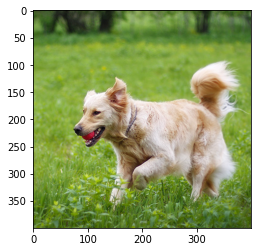

In [54]:
# Open and show image
dog_image = Image.open('dogimage.jpg')
dog_image2 = Image.open('dogimage2.jpg')
plt.imshow(dog_image)
plt.imshow(dog_image2)

1/1 [==============================] - 0s 22ms/step


array([[0.7638454]], dtype=float32)

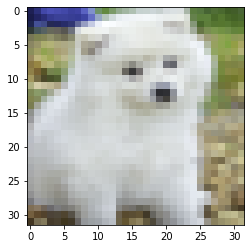

In [55]:
evaluateImage(dog_image)

1/1 [==============================] - 0s 17ms/step


array([[0.29273143]], dtype=float32)

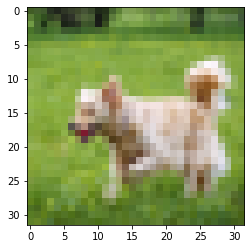

In [56]:
evaluateImage(dog_image2)

For the first image, the model returns a probablity > 0.7 which is a decently good result. However for the second image the model only returns 0.293, which is concerningly low. I suspect that the second image scores so low because it's background is much bigger than the first images, giving the model less pixels it can determine the dog from.